In [1]:
!pip install opencv-python

In [2]:
n=input("please enter number.\n")
while(1):
    if(n.isdigit()==True):
        if((int(n)>0 and int(n)<=20)):
            break
            
    print("ERROR,please enter number between 1~20.")
    n=input("please enter number.\n")


print("Number:",int(n))

please enter number.
9
Number: 9


(375, 499, 3)


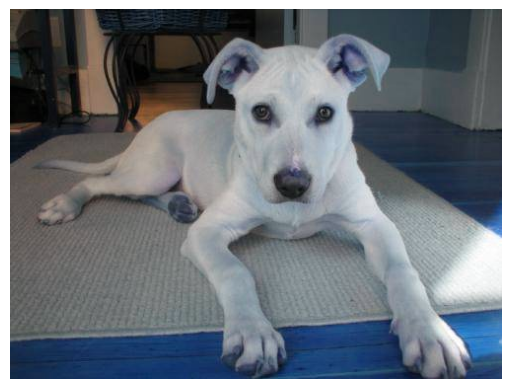

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
path="HW1 image/test/"
img = cv2.imread(path+"pic"+str(n)+".jpg")
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)# BGR -> RGB
plt.imshow(img) 
plt.axis('off')
print (img.shape)

(64, 64, 3)


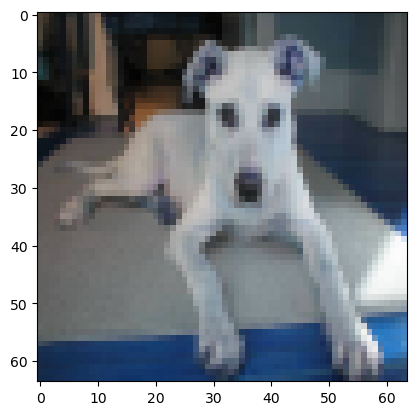

In [4]:
new_img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)
print (new_img.shape)
plt.imshow(new_img)

In [5]:
import pandas as pd
reference_path="HW1 image/reference/"
df = pd.DataFrame(columns=["Name", "value", "label"])
H=64
G=64
for m in range(1,51):
    #resize
    c_img = cv2.imread(reference_path+"cats/cat."+str(m)+".jpg")
    d_img = cv2.imread(reference_path+"dogs/dog."+str(m)+".jpg")
    c_img=cv2.resize(c_img, (64, 64), interpolation=cv2.INTER_AREA)
    d_img=cv2.resize(d_img, (64, 64), interpolation=cv2.INTER_AREA)
    
    c_value =0
    d_value =0
    for c in range(2):
        for i in range(H):
            for j in range(G):
                c_value+=(abs(int(c_img[i][j][c])-int(new_img[i][j][c]))/(64*64*3))
                d_value+=(abs(int(d_img[i][j][c])-int(new_img[i][j][c]))/(64*64*3))
    ctmp={'Name':"cat."+str(m),'value':c_value,'label':'cat'}
    dtmp={'Name':"dog."+str(m),'value':d_value,'label':'dog'}
#     print(ctmp)
#     print(dtmp)
    df = df.append(ctmp, ignore_index=True)
    df = df.append(dtmp, ignore_index=True)


df

C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Tem

C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_2280\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Tem

,Name,value,label
0,cat.1,37.608073,cat
1,dog.1,50.702148,dog
2,cat.2,39.453613,cat
3,dog.2,45.466309,dog
4,cat.3,44.762614,cat
...,...,...,...
95,dog.48,44.288981,dog
96,cat.49,44.076660,cat
97,dog.49,38.859538,dog
98,cat.50,46.648193,cat


In [6]:
df=df.sort_values(by=['value'],ascending=True)
df=df.reset_index(drop=True)
df

,Name,value,label
0,dog.44,31.313802,dog
1,dog.32,32.731120,dog
2,cat.41,32.744059,cat
3,cat.28,33.903239,cat
4,dog.22,34.694499,dog
...,...,...,...
95,cat.5,64.971273,cat
96,dog.38,68.493734,dog
97,cat.36,73.108643,cat
98,dog.15,76.602376,dog


dog.44 : 31.3138020833332


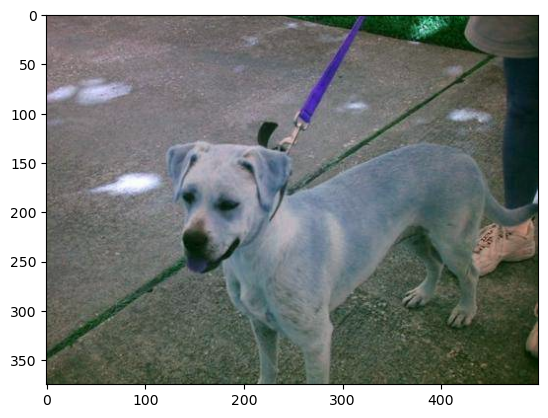

dog.32 : 32.73111979166667


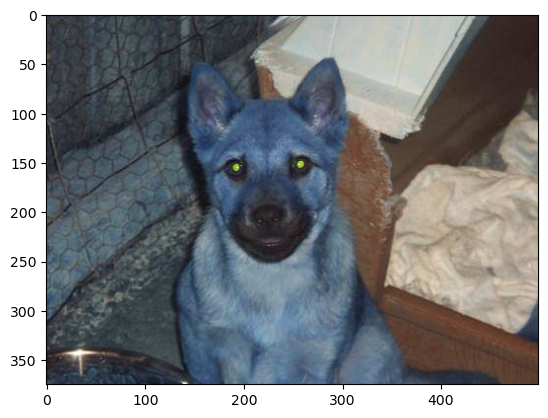

cat.41 : 32.74405924479175


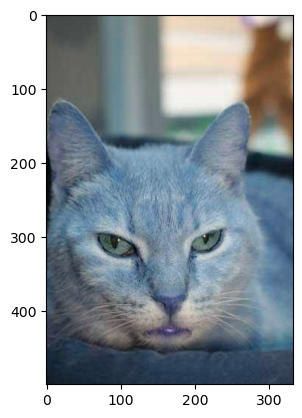


Result: cat:1, dog:2
Image is more like dog.


In [8]:
k=3
dog=0
cat=0
for t in range(k):
    if(df['label'][t]=='cat'):
        print(df['Name'][t],":",df['value'][t])
        cat+=1
    else: #df2['label'][t]=='cat'
        print(df['Name'][t],":",df['value'][t])
        dog+=1
    t_img = cv2.imread(reference_path+str(df['label'][t])+"s/"+str(df['Name'][t])+".jpg")
    plt.imshow(t_img)
    plt.show()

print("\nResult: cat:{}, dog:{}".format(cat,dog))

if(cat>dog):
    print("Image is more like cat.")
else: #(dog>cat)
    print("Image is more like dog.")

In [9]:

for k in range(1,50,2):
    dog=0
    cat=0
    for t in range(k):
        if(df['label'][t]=='cat'):
#             print(df['Name'][t],":",df['value'][t])
            cat+=1
        else: #df2['label'][t]=='cat'
#             print(df['Name'][t],":",df['value'][t])
            dog+=1
        t_img = cv2.imread(reference_path+str(df['label'][t])+"s/"+str(df['Name'][t])+".jpg")
#         plt.imshow(t_img)
#         plt.show()

    print("\nResult K:{}, cat:{}, dog:{}".format(k,cat,dog))

    if(cat>dog):
        print("Image is more like cat.")
    else: #(dog>cat)
        print("Image is more like dog.")
    print("\n.")


Result K:1, cat:0, dog:1
Image is more like dog.

.

Result K:3, cat:1, dog:2
Image is more like dog.

.

Result K:5, cat:2, dog:3
Image is more like dog.

.

Result K:7, cat:4, dog:3
Image is more like cat.

.

Result K:9, cat:5, dog:4
Image is more like cat.

.

Result K:11, cat:6, dog:5
Image is more like cat.

.

Result K:13, cat:8, dog:5
Image is more like cat.

.

Result K:15, cat:10, dog:5
Image is more like cat.

.

Result K:17, cat:10, dog:7
Image is more like cat.

.

Result K:19, cat:12, dog:7
Image is more like cat.

.

Result K:21, cat:13, dog:8
Image is more like cat.

.

Result K:23, cat:15, dog:8
Image is more like cat.

.

Result K:25, cat:15, dog:10
Image is more like cat.

.

Result K:27, cat:15, dog:12
Image is more like cat.

.

Result K:29, cat:17, dog:12
Image is more like cat.

.

Result K:31, cat:17, dog:14
Image is more like cat.

.

Result K:33, cat:18, dog:15
Image is more like cat.

.

Result K:35, cat:19, dog:16
Image is more like cat.

.

Result K:37, ca

## **討論: <br> 測試多個k值後，k=1時相對準確，但也不能算正確，因樣本數太過單一。<br>其他k值誤差更多，後續改善可能要更改算法或是再增加樣本數。**